In [1]:
import izzy as iz
import matplotlib.pyplot as plt
import pandas as pd

iz.set_theme('darcula')

In [8]:
# Load breast_cancer dataset
df = iz.breast_cancer_dataset()
print(df.columns)

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension',
       'target'],
      dtype='object')


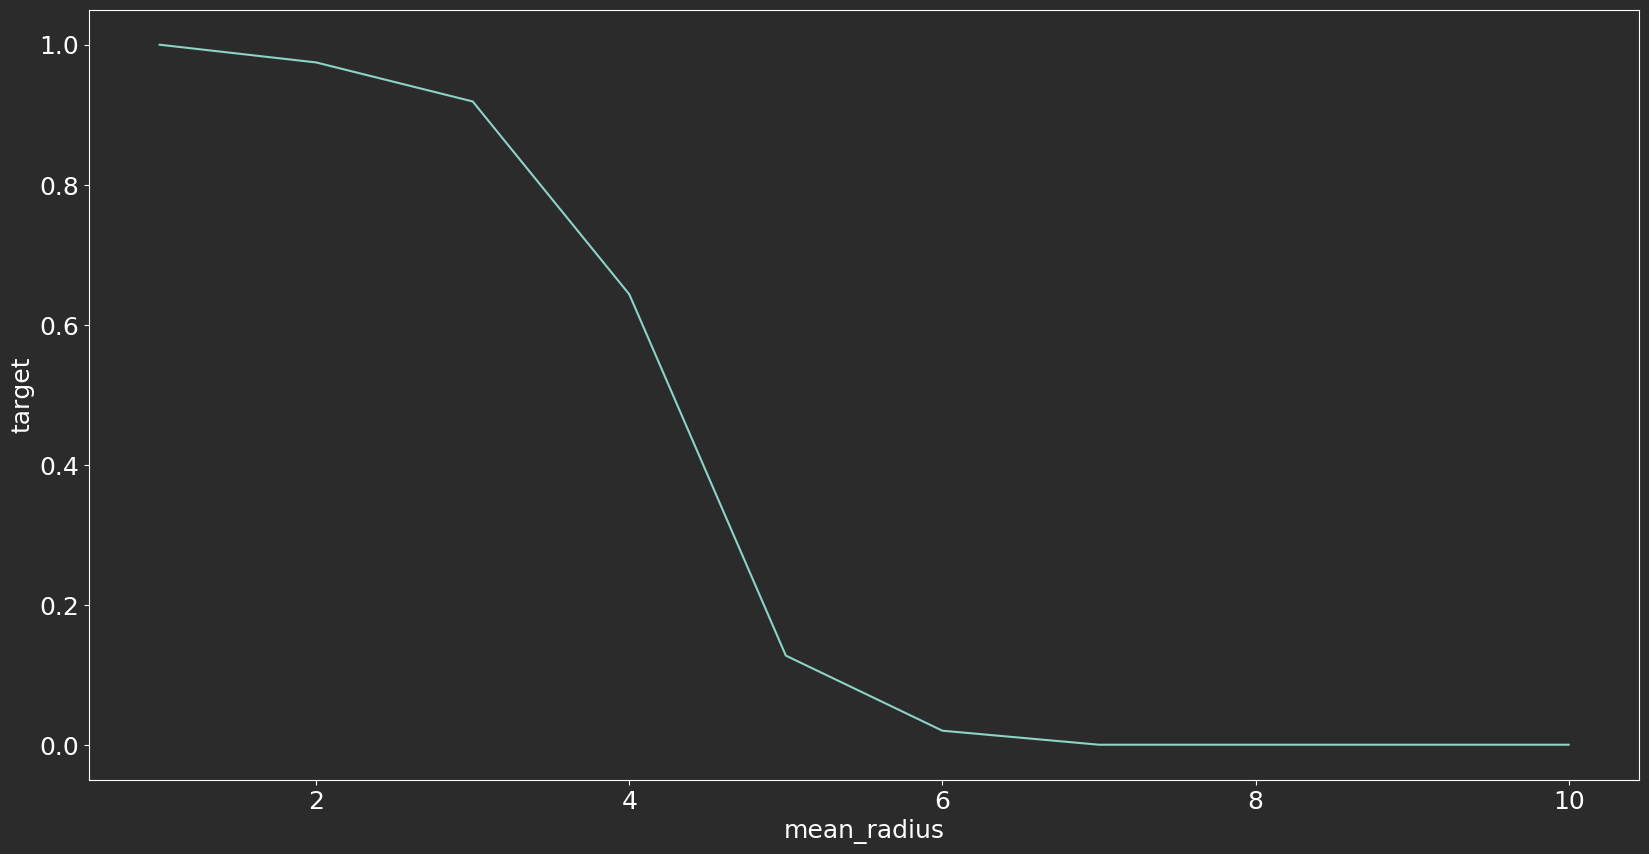

In [10]:
# Understand feature relationships with outcome
iz.fviz1d(x=df['mean_radius'], y=df['target'], mode='quantile')

In [11]:
# build a simple predictive model
x = df[['mean_radius']]
y = df['target']
model = iz.LogisticRegression(penalty='none', solver='lbfgs', class_weight='balanced')
model.fit(x, y)

In [12]:
model.performance_report(x, y)

AttributeError: every class in y_pred must be in classes

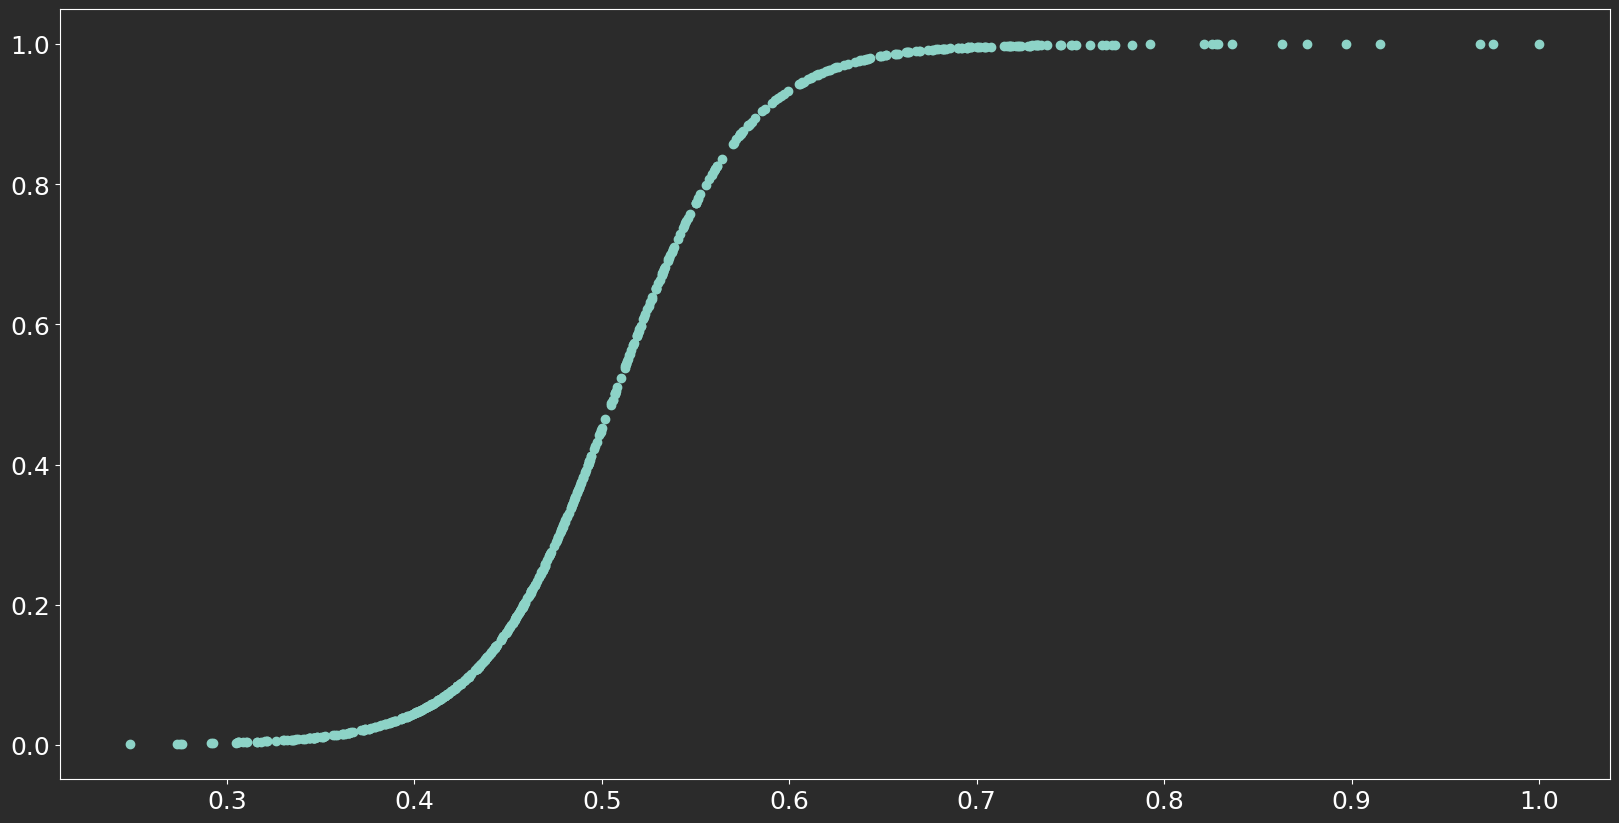

In [13]:
p0 = model.predict_proba(x)[:, 0]
p1 = model.predict_proba(x)[:, 1]

import numpy as np
plt.figure(figsize=(20, 10))
plt.plot(x.values / np.max(x.values), p0, 'o')
plt.show()


In [ ]:
# what is the model performance?
# print(model.performance(x, y))

In [ ]:
from sklearn.metrics import auc, roc_auc_score, roc_curve

y_prob = model.predict_proba(x)[:, 1]
fpr0, tpr0, _ = roc_curve(y, y_prob)
fpr1, tpr1 = iz.classification.metrics.roc(y, y_prob)

print(roc_auc_score(y, y_prob))
print(auc(fpr0, tpr0))
print(auc(fpr1, tpr1))
print(iz.roc_auc(y, y_prob))

plt.figure(figsize=(20, 10))
plt.plot(fpr0, tpr0)
plt.plot(fpr1, tpr1)
plt.show()

In [ ]:
iz.roc_plot(y, y_prob)
    